In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle

In [2]:
os.getcwd()

'C:\\Users\\altoz_aaxmwbk\\Documents\\Projects\\HASSIO_Facial_Recognition\\model'

In [34]:
DATA_DIR = '../train/'
CATEGORIES = ['sydney', 'zach']

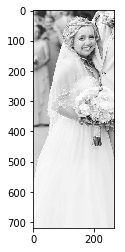

In [35]:
for cat in CATEGORIES:
    path = os.path.join(DATA_DIR, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [36]:
print(img_array.shape)

(719, 269)


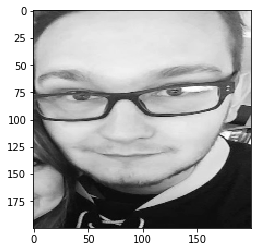

In [37]:
IMG_SIZE = 200
for cat in CATEGORIES:
    path = os.path.join(DATA_DIR, cat)
    class_num = CATEGORIES.index(cat)
    
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except:
            pass
            
plt.imshow(new_array, cmap="gray")
plt.show()

In [30]:
training_data = []

In [31]:
def create_training_data(IMG_SIZE=200):
    for cat in CATEGORIES:
        path = os.path.join(DATA_DIR, cat)
        class_num = CATEGORIES.index(cat)

        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

In [39]:
create_training_data()

In [40]:
random.shuffle(training_data)

In [41]:
# cool, now we have mixed up the dataset! Remeber 0=sydney, 1=zach

for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
1
1
1


In [42]:
X = []
y = []

In [43]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [44]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [46]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out_y = open("y.pickle", "wb")
pickle.dump(y, pickle_out_y)
pickle_out_y.close()